# Notebook for Player Graphs

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Any player's data can be saved and loaded into this notebook to make graphs that look at their weekly and seasonal average points per game.

In [4]:
df = pd.read_csv('./tb.csv')

In [5]:
df.head(20)

,Unnamed: 0,Year,G#,Week,Age,Tm,Home,Opp,Att,Cmp%,Sk,Ru_Att,RANK,Dome,Total
0,0,2017,1.0,1.0,40.035,NWE,1.0,KAN,36.0,44.44,3.0,2.0,15,0,10.68
1,1,2017,2.0,2.0,40.045,NWE,0.0,NOR,39.0,76.92,2.0,2.0,10,1,31.78
2,2,2017,3.0,3.0,40.052,NWE,1.0,HOU,35.0,71.43,5.0,1.0,32,1,36.72
3,3,2017,4.0,4.0,40.059,NWE,1.0,CAR,45.0,71.11,3.0,1.0,11,0,20.48
4,4,2017,5.0,5.0,40.063,NWE,0.0,TAM,40.0,75.00,3.0,2.0,23,0,14.62
5,5,2017,6.0,6.0,40.073,NWE,0.0,NYJ,38.0,52.63,0.0,1.0,23,0,16.18
6,6,2017,16.0,17.0,40.150,NWE,1.0,NYJ,37.0,48.65,2.0,0.0,23,0,15.60
7,7,2017,7.0,7.0,40.080,NWE,1.0,ATL,29.0,72.41,2.0,5.0,8,1,19.46
8,8,2017,8.0,8.0,40.087,NWE,1.0,LAC,47.0,68.09,3.0,1.0,3,1,18.52
9,9,2017,9.0,10.0,40.101,NWE,0.0,DEN,34.0,73.53,1.0,1.0,23,0,22.64


In [6]:
#resort the values
df = df.sort_values(by=['Year', 'Week'])

In [7]:
df.head(10)

,Unnamed: 0,Year,G#,Week,Age,Tm,Home,Opp,Att,Cmp%,Sk,Ru_Att,RANK,Dome,Total
0,0,2017,1.0,1.0,40.035,NWE,1.0,KAN,36.0,44.44,3.0,2.0,15,0,10.68
1,1,2017,2.0,2.0,40.045,NWE,0.0,NOR,39.0,76.92,2.0,2.0,10,1,31.78
2,2,2017,3.0,3.0,40.052,NWE,1.0,HOU,35.0,71.43,5.0,1.0,32,1,36.72
3,3,2017,4.0,4.0,40.059,NWE,1.0,CAR,45.0,71.11,3.0,1.0,11,0,20.48
4,4,2017,5.0,5.0,40.063,NWE,0.0,TAM,40.0,75.00,3.0,2.0,23,0,14.62
5,5,2017,6.0,6.0,40.073,NWE,0.0,NYJ,38.0,52.63,0.0,1.0,23,0,16.18
7,7,2017,7.0,7.0,40.080,NWE,1.0,ATL,29.0,72.41,2.0,5.0,8,1,19.46
8,8,2017,8.0,8.0,40.087,NWE,1.0,LAC,47.0,68.09,3.0,1.0,3,1,18.52
9,9,2017,9.0,10.0,40.101,NWE,0.0,DEN,34.0,73.53,1.0,1.0,23,0,22.64
10,10,2017,11.0,12.0,40.115,NWE,1.0,MIA,28.0,64.29,1.0,5.0,27,0,22.68


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  82 non-null     int64  
 1   Year        82 non-null     int64  
 2   G#          82 non-null     float64
 3   Week        82 non-null     float64
 4   Age         82 non-null     float64
 5   Tm          82 non-null     object 
 6   Home        82 non-null     float64
 7   Opp         82 non-null     object 
 8   Att         82 non-null     float64
 9   Cmp%        82 non-null     float64
 10  Sk          82 non-null     float64
 11  Ru_Att      82 non-null     float64
 12  RANK        82 non-null     int64  
 13  Dome        82 non-null     int64  
 14  Total       82 non-null     float64
dtypes: float64(9), int64(4), object(2)
memory usage: 9.7+ KB


In [28]:
#2020
weekly_PPR = df[df['Year'] == 2020]

In [ ]:
_PPR = weekly_PPR.sort_values(by=['Week'])

In [29]:
weekly_PPR

,Unnamed: 0,Year,G#,Week,Age,Tm,Home,Opp,Att,Cmp%,Sk,Ru_Att,RANK,Dome,Total
47,47,2020,1.0,1.0,43.041,TAM,0.0,NOR,36.0,63.89,3.0,3.0,5,1,21.46
49,49,2020,2.0,2.0,43.048,TAM,1.0,CAR,35.0,65.71,0.0,1.0,18,0,10.68
51,51,2020,3.0,3.0,43.055,TAM,0.0,DEN,38.0,65.79,2.0,5.0,25,0,23.88
52,52,2020,4.0,4.0,43.062,TAM,1.0,LAC,46.0,65.22,0.0,3.0,22,1,33.46
53,53,2020,5.0,5.0,43.066,TAM,0.0,CHI,41.0,60.98,3.0,3.0,12,0,14.12
54,54,2020,6.0,6.0,43.076,TAM,1.0,GNB,27.0,62.96,0.0,0.0,15,0,14.64
55,55,2020,7.0,7.0,43.083,TAM,0.0,LVR,45.0,73.33,0.0,1.0,29,1,37.86
56,56,2020,8.0,8.0,43.091,TAM,0.0,NYG,40.0,70.00,2.0,1.0,8,0,19.06
48,48,2020,9.0,9.0,43.097,TAM,1.0,NOR,38.0,57.89,3.0,0.0,5,1,3.36
50,50,2020,10.0,10.0,43.104,TAM,0.0,CAR,39.0,71.79,1.0,2.0,18,0,31.84


# Line Graph for 2020 Points per Week

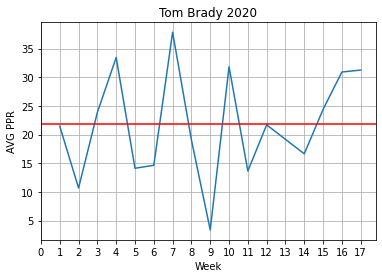

In [55]:
tb_plot = sns.lineplot(data=weekly_PPR, x='Week', y='Total')
plt.axhline(y=weekly_PPR.Total.mean(),color='red')
plt.ylabel('AVG PPR')
plt.grid()
tb_plot.set_title('Tom Brady 2020')
tb_plot.set_xticks(range(18))
plt.savefig('Tom_Brady_2020')

# Avg Points per Season

<AxesSubplot:xlabel='Year', ylabel='Total'>

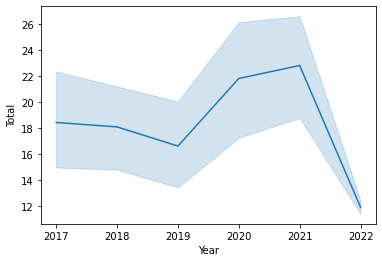

In [27]:
sns.lineplot(data=df, x='Year', y='Total')